## daily data updates for the helioforecast.space website

Main author: C. Möstl, Austrian Space Weather Office, GeoSphere Austria

https://github.com/cmoestl/heliocats

uses environment 'envs/env_helio4.yml'


In [10]:
# https://github.com/cmoestl/heliocats  data_update_web.py

# for updating data every day on the servers

import pickle
import importlib
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import sys
import numpy as np
import datetime
import scipy.signal
import urllib
import json
import os   
import time
import h5py
import pytz
import copy
import cdflib

from heliocats import data as hd
from heliocats import plot as hp


##### check for system type
#server
if sys.platform == 'linux': 
    print('system is linux')
    matplotlib.use('Agg') 
#mac
if sys.platform =='darwin':  
    print('system is mac')
    %matplotlib inline     



################################################ CHECK  ##############################################
os.system('jupyter nbconvert --to script data_update_web.ipynb')   

#switches
debug_mode=0


#switches
get_omni=1
get_noaa=1
get_wind=1
get_stereoa=1

####################################################################################################################


#test execution times
t0all = time.time()


system is mac


[NbConvertApp] Converting notebook data_update_web.ipynb to script
[NbConvertApp] Writing 8628 bytes to data_update_web.py


### Configure paths depending on server or local machine


In [2]:
if sys.platform == 'linux': 
    
    from config_server import data_path
    from config_server import noaa_path
    from config_server import wind_path
    from config_server import stereoa_path
    from config_server import data_path_ml
    
if sys.platform =='darwin':  

    from config_local import data_path
    from config_local import noaa_path
    from config_local import wind_path
    from config_local import stereoa_path
    from config_local import data_path_ml

print(' ')
print('------ PATHS ')

print(data_path)
print(noaa_path)
print(wind_path)
print(stereoa_path)
print(data_path_ml)


plot_path=data_path+'plots/'
position_path=data_path+'plots_positions/'
sun_path=data_path+'plots_sun/'

print(plot_path)
print(position_path)



########### make directories first time
if os.path.isdir(plot_path) == False: os.mkdir(plot_path)
if os.path.isdir(plot_path+'omni2') == False: os.mkdir(plot_path+'omni2')
if os.path.isdir(plot_path+'wind') == False: os.mkdir(plot_path+'wind')
if os.path.isdir(plot_path+'stereoa') == False: os.mkdir(plot_path+'stereoa')
if os.path.isdir(plot_path+'combined') == False: os.mkdir(plot_path+'combined')


if os.path.isdir(position_path) == False: os.mkdir(position_path)
if os.path.isdir(sun_path) == False: os.mkdir(sun_path)
if os.path.isdir(noaa_path) == False: os.mkdir(noaa_path)
if os.path.isdir(data_path_ml) == False: os.mkdir(data_path_ml)

 
------ PATHS 
/Users/chris/python/data/insitu_python/
/Users/chris/python/ops/data/noaa/
/Users/chris/python/data/wind/
/Users/chris/python/data/stereoa/
/Users/chris/python/data/insitu_python/ML_struct_arrays/
/Users/chris/python/data/insitu_python/plots/
/Users/chris/python/data/insitu_python/plots_positions/


## Development cells

### positions and SDO plot

 
------ POSITIONS 
saved as  /Users/chris/python/data/insitu_python/plots_positions/positions_2023_Jul_21.png
saved as  /Users/chris/python/data/insitu_python/plots_positions/positions_now.png


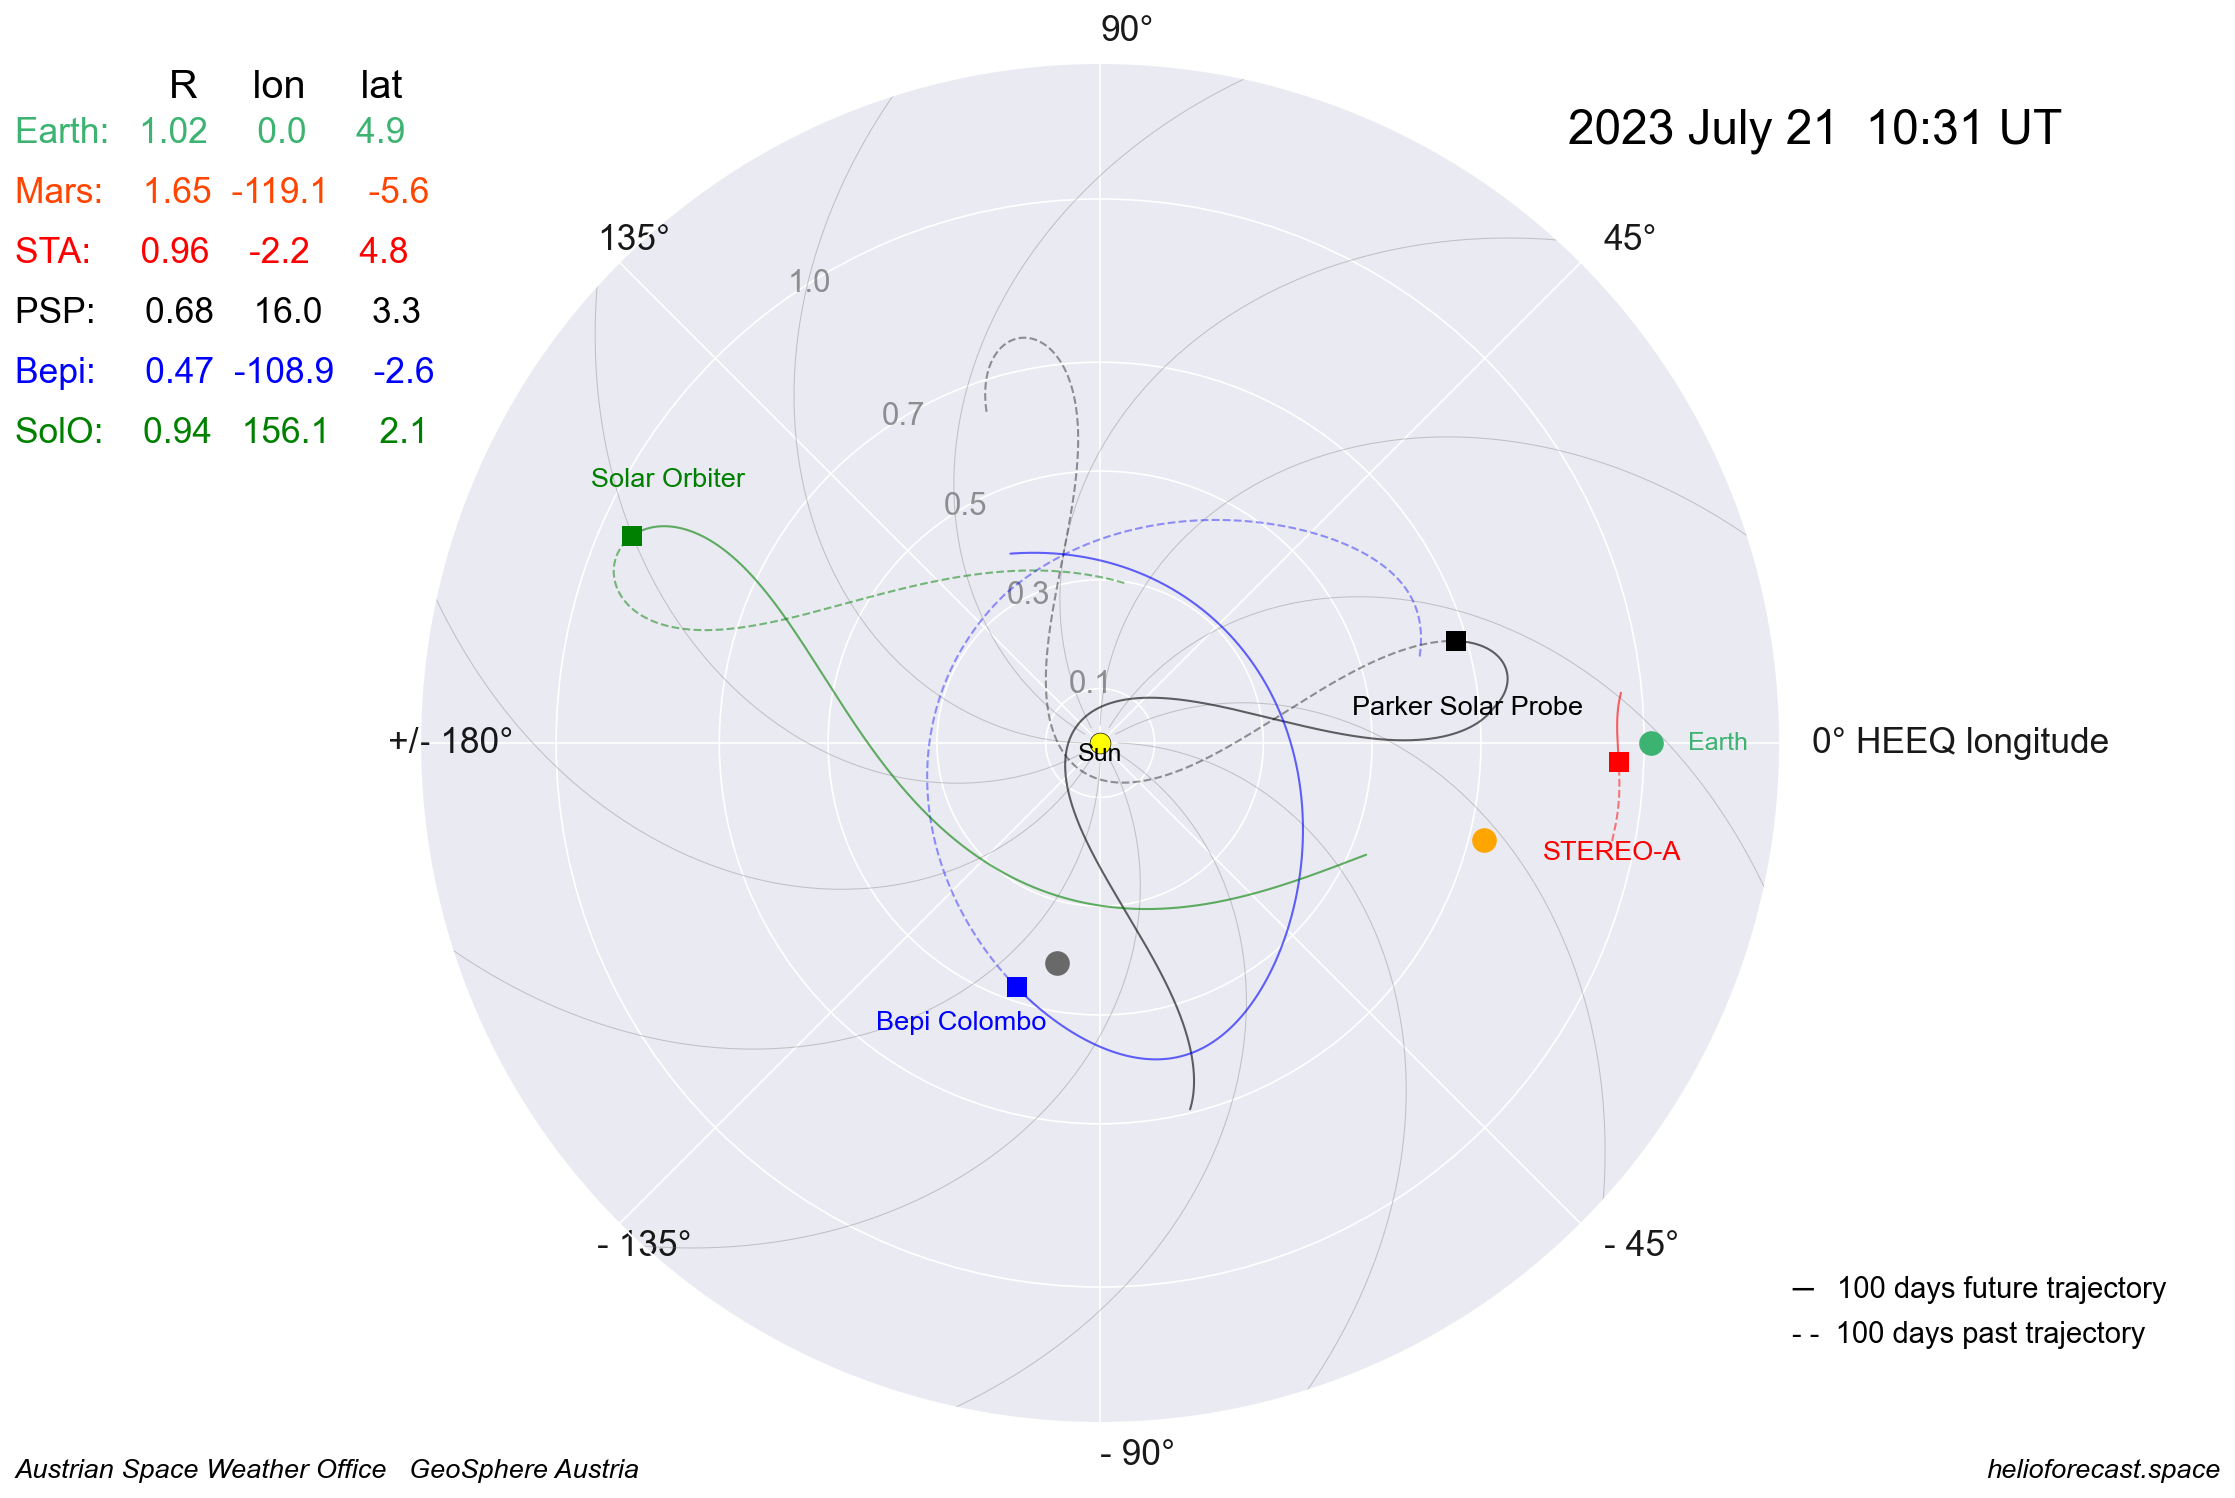

 
------ SDO realtime images 
saved  /Users/chris/python/data/insitu_python/plots_sun/latest_1024_0193.jpg
2023-07-21 08:58 UT


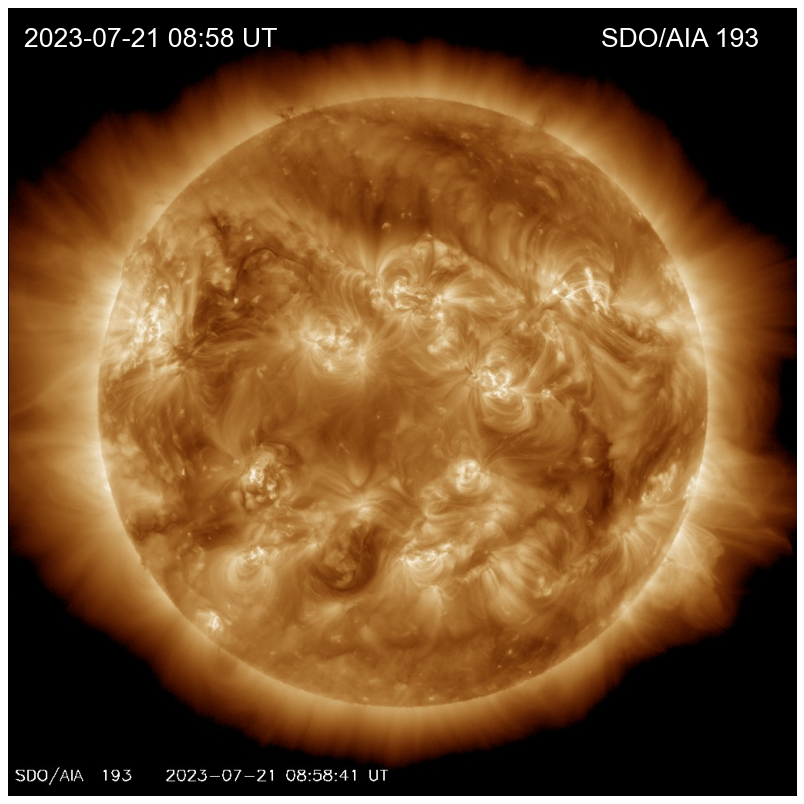

saved  /Users/chris/python/data/insitu_python/plots_sun/latest_1024_HMIB.jpg
2023-07-21 08:30 UT


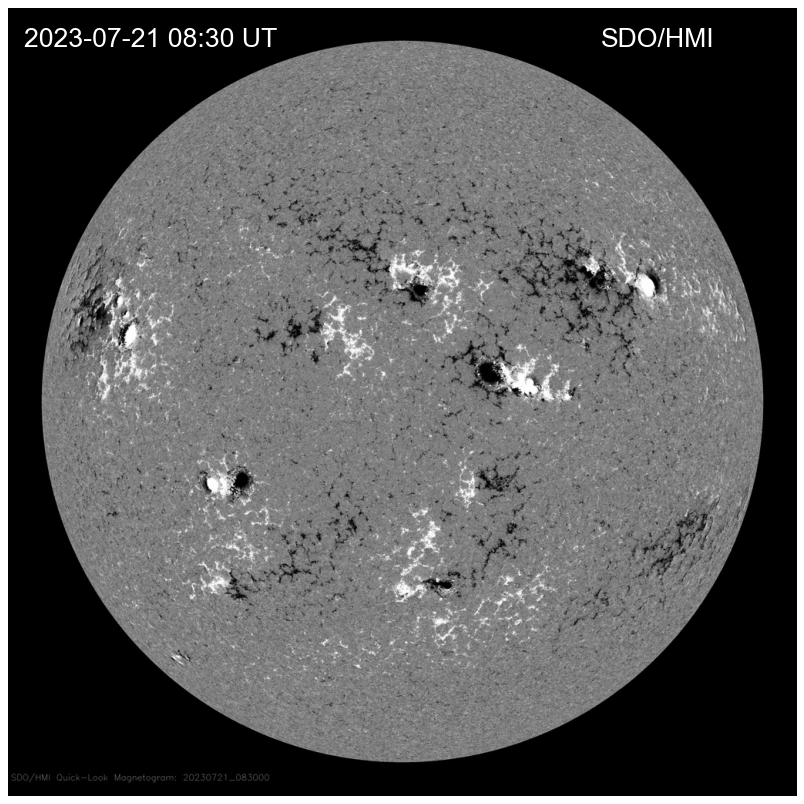


Positions and SDO images takes 5.83 seconds


In [3]:

if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 


t0 = time.time()
print(' ')
print('------ POSITIONS ')

# spacecraft positions image
hp.plot_positions(datetime.datetime.utcnow(),position_path, 'HEEQ',now=True)

print(' ')
print('------ SDO realtime images ')
# get current SDO images 
hd.get_sdo_realtime_image(sun_path)

t1 = time.time()
print()
print('Positions and SDO images takes', np.round(t1-t0,2), 'seconds')

### OMNI2 data


 
------ OMNI2 
start omni
load OMNI2 .dat into "data" directory from
https://spdf.gsfc.nasa.gov/pub/data/omni/low_res_omni/omni2_all_years.dat
534720  datapoints
position start
position end 
done omni

saved as  /Users/chris/python/data/insitu_python/plots/omni2/OMNI2_2022_Jul_21_2023_Jul_21.png
saved as  /Users/chris/python/data/insitu_python/plots/omni2/OMNI2_2022_Jul_21_2023_Jul_21.pdf
saved as  /Users/chris/python/data/insitu_python/plots/omni2/OMNI2_now.png
saved as  /Users/chris/python/data/insitu_python/plots/omni2/OMNI2_now.pdf


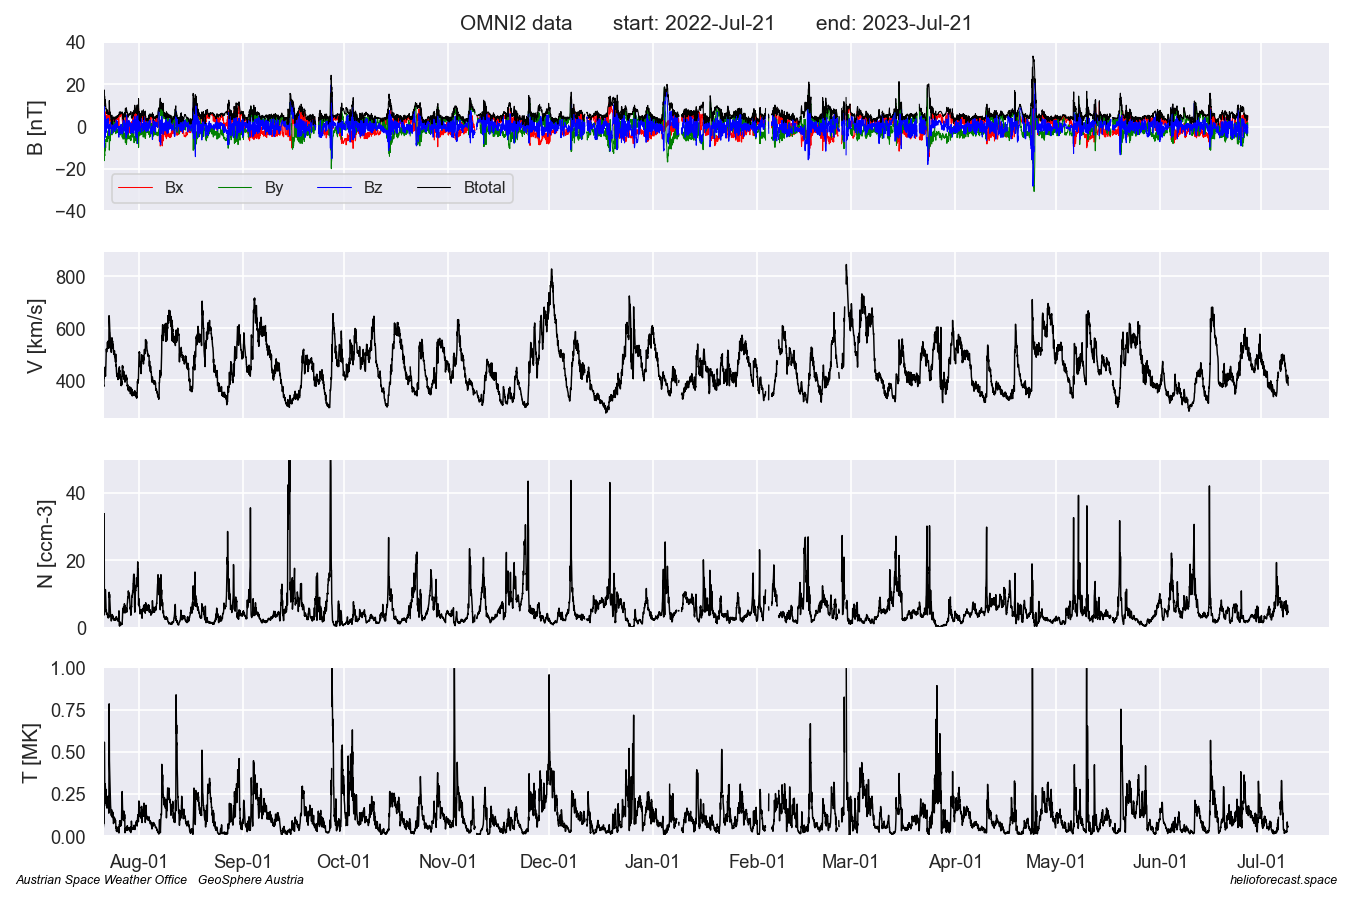

In [4]:
if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 
    
print(' ')
print('------ OMNI2 ')


# OMNI2
fileomni="omni_1963_now.p"
#this function downloads and saves the the omni2 data
if get_omni: 
    hd.save_omni_data(data_path,fileomni)
else:
    print('OMNI data NOT downloaded, turn on switch')
[o,ho]=pickle.load(open(data_path+fileomni, "rb" ) )  

start=datetime.datetime.utcnow() - datetime.timedelta(days=365)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update(o, start, end,'OMNI2',plot_path+'omni2/',now=True)

### NOAA real time solar wind and Dst

 
------ NOAA real time solar wind data 
download NOAA real time solar wind plasma and mag and dst
2023-07-21 UTC
/Users/chris/python/ops/data/noaa/plasma/plasma-7-day_2023-07-21.json
/Users/chris/python/ops/data/noaa/mag/mag-7-day_2023-07-21.json
/Users/chris/python/ops/data/noaa/dst/dst-7-day_2023-07-21.json
NOAA RTSW download complete
 
convert NOAA real time solar wind archive to pickle file
directories for the json data
/Users/chris/python/ops/data/noaa/mag/
Sorted file list to be read with cutoff  300  files. 
['mag-7-day_2023-06-06T23h.json' 'mag-7-day_2023-06-07T05h.json'
 'mag-7-day_2023-06-07T11h.json' 'mag-7-day_2023-06-07T17h.json'
 'mag-7-day_2023-06-07T23h.json' 'mag-7-day_2023-06-08T05h.json'
 'mag-7-day_2023-06-08T11h.json' 'mag-7-day_2023-06-08T17h.json'
 'mag-7-day_2023-06-08T23h.json' 'mag-7-day_2023-06-09T05h.json'
 'mag-7-day_2023-06-09T11h.json' 'mag-7-day_2023-06-09T17h.json'
 'mag-7-day_2023-06-09T23h.json' 'mag-7-day_2023-06-10T05h.json'
 'mag-7-day_2023-06-10T

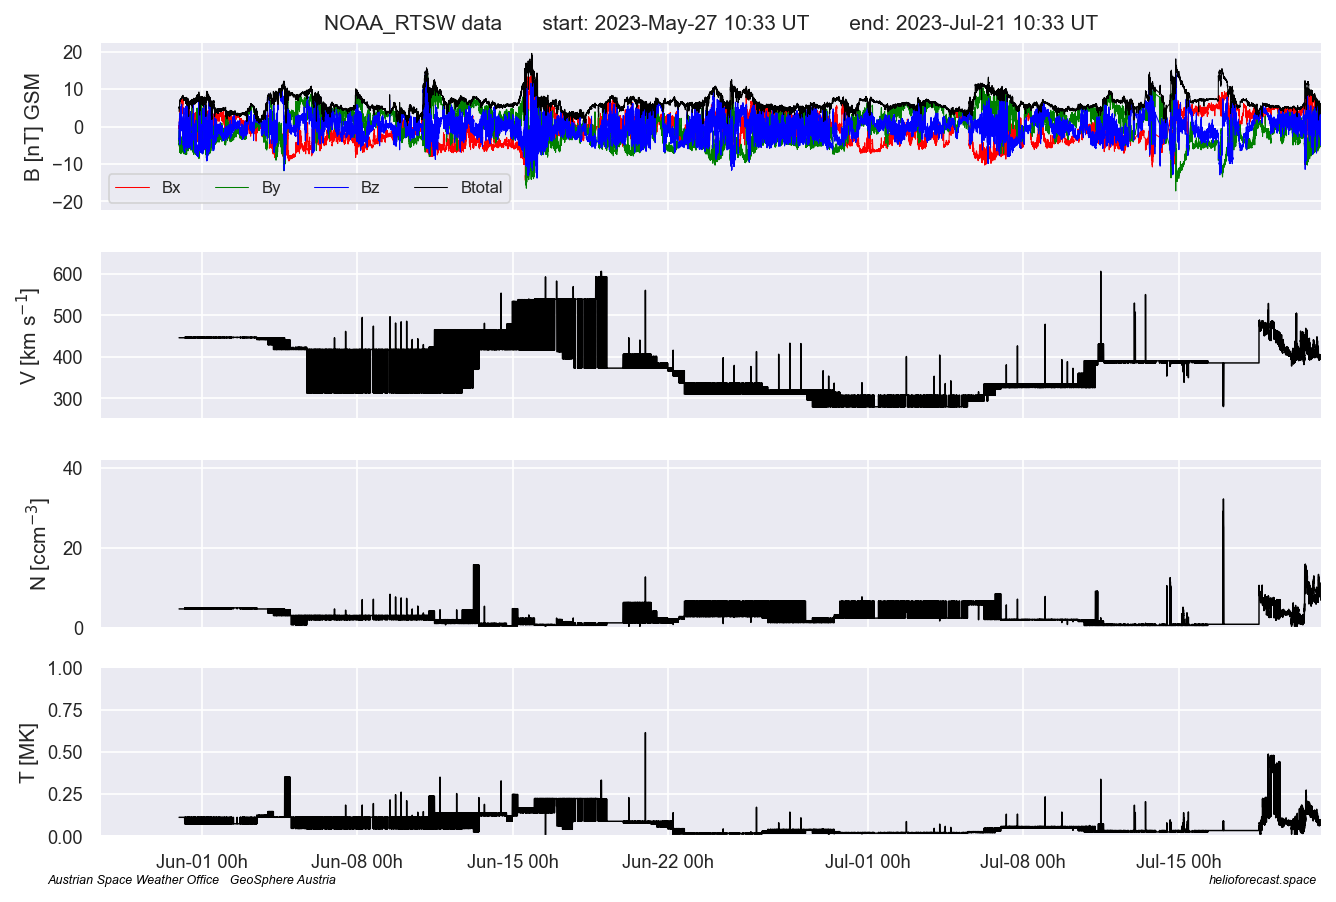

In [5]:
if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 

print(' ')
print('------ NOAA real time solar wind data ')

#test execution times
t0 = time.time()

filenoaa='noaa_rtsw_last_300files_now.p'


if get_noaa > 0:
    print('download NOAA real time solar wind plasma and mag and dst')
    datestr=str(datetime.datetime.utcnow().strftime("%Y-%m-%d"))
    print(datestr+' UTC')

    plasma='http://services.swpc.noaa.gov/products/solar-wind/plasma-7-day.json'
    mag='http://services.swpc.noaa.gov/products/solar-wind/mag-7-day.json'
    dst='https://services.swpc.noaa.gov/products/kyoto-dst.json'

    try: 
        urllib.request.urlretrieve(plasma, noaa_path+'plasma/plasma-7-day_'+datestr+'.json')
        print(noaa_path+'plasma/plasma-7-day_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', plasma,' ',e.reason)

    try: 
        urllib.request.urlretrieve(mag, noaa_path+'mag/mag-7-day_'+datestr+'.json')
        print(noaa_path+'mag/mag-7-day_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', mag,' ',e.reason)
        

    try: 
        urllib.request.urlretrieve(dst, noaa_path+'dst/dst-7-day_'+datestr+'.json')
        print(noaa_path+'dst/dst-7-day_'+datestr+'.json')
    except urllib.error.URLError as e:
        print(' ', mag,' ',e.reason)
 
    print('NOAA RTSW download complete')
    
    
    ######## SAVE NOAA DATA AS PICKLE
    # last parameter gives a cutoff, so only the latest N files are taken for the NOAA data pickle file
    hd.save_noaa_rtsw_data(data_path,noaa_path,filenoaa,300)

    [noaa,hnoaa]=pickle.load(open(data_path+filenoaa, "rb" ) ) 
    print('NOAA RTSW saved as pickle file complete', filenoaa)


else:
    print('NOAA data NOT downloaded and saved as pickle, turn on switch')  
 
    
[noaa,hnoaa]=pickle.load(open(data_path+filenoaa, "rb" ) ) 


#plot
start=datetime.datetime.utcnow() - datetime.timedelta(days=55)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update_noaa_rtsw(noaa, start, end,'NOAA_RTSW',plot_path+'noaa/',now2=True)


t1 = time.time()

print()
print('NOAA download latest file, save as pickle last 300 files and plotting takes', np.round(t1-t0,2), 'seconds')

    

### Wind data

In [9]:

if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 

    
print(' ')
print('------ download Wind data ')


#download data for current year only    
if get_wind > 0:
    hd.wind_download_ascii(start_year=datetime.datetime.utcnow().year, wind_path=wind_path) 
else:
    print('Wind data NOT downloaded, turn on switch')  

    
    
    
#filewin="wind_2018_now_heeq.p" 
#start=datetime.datetime(2022, 12, 1)
#start=datetime.datetime(2022, 12, 1)
#end=datetime.datetime.utcnow()

#hd.save_wind_data_ascii(data_path,filewin,start,end,coord='HEEQ')
#[win,winh]=pickle.load(open(data_path+filewin, "rb"))
#start=win.time[-1]-datetime.timedelta(days=365)
#end=datetime.datetime.utcnow()         
#hp.plot_insitu_update(win, start, end,'Wind',plot_path+'wind/',now=True)



 
------ download Wind data 
downloading Wind ascii data to  /Users/chris/python/data/wind/
for years ['2023']
https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/ascii/1min_ascii/
202301_wind_mag_1min.asc
202302_wind_mag_1min.asc
202303_wind_mag_1min.asc


KeyboardInterrupt: 

### STEREO-A beacon data

 
------ STEREO-A beacon data 
 
--- download STEREO-A beacon data last 30 days 
download STEREO-A beacon data to  /Users/chris/python/data/stereoa/
STA_LB_IMPACT_20230621_V02.cdf
STA_LB_PLASTIC_20230621_V14.cdf
STA_LB_IMPACT_20230622_V02.cdf
STA_LB_PLASTIC_20230622_V14.cdf
STA_LB_IMPACT_20230623_V02.cdf
STA_LB_PLASTIC_20230623_V14.cdf
STA_LB_IMPACT_20230624_V02.cdf
STA_LB_PLASTIC_20230624_V14.cdf
STA_LB_IMPACT_20230625_V02.cdf
STA_LB_PLASTIC_20230625_V14.cdf
STA_LB_IMPACT_20230626_V02.cdf
STA_LB_PLASTIC_20230626_V14.cdf
STA_LB_IMPACT_20230627_V02.cdf
STA_LB_PLASTIC_20230627_V14.cdf
STA_LB_IMPACT_20230628_V02.cdf
STA_LB_PLASTIC_20230628_V14.cdf
STA_LB_IMPACT_20230629_V02.cdf
STA_LB_PLASTIC_20230629_V14.cdf
STA_LB_IMPACT_20230630_V02.cdf
STA_LB_PLASTIC_20230630_V14.cdf
STA_LB_IMPACT_20230701_V02.cdf
STA_LB_PLASTIC_20230701_V14.cdf
STA_LB_IMPACT_20230702_V02.cdf
STA_LB_PLASTIC_20230702_V14.cdf
STA_LB_IMPACT_20230703_V02.cdf
STA_LB_PLASTIC_20230703_V14.cdf
STA_LB_IMPACT_20230704_V02.cdf
S

100.0% 1409024 / 1401856


100.0% 983040 / 975872


position end 
save pickle file
done sta
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_2023_Jul_11_2023_Jul_21.png
saved as  /Users/chris/python/data/insitu_python/plots/stereoa/STEREO-A_beacon_now.png

STEREO-A beacon downloading last 30 days, save as pickle last 300 days and plotting takes 161.24 seconds


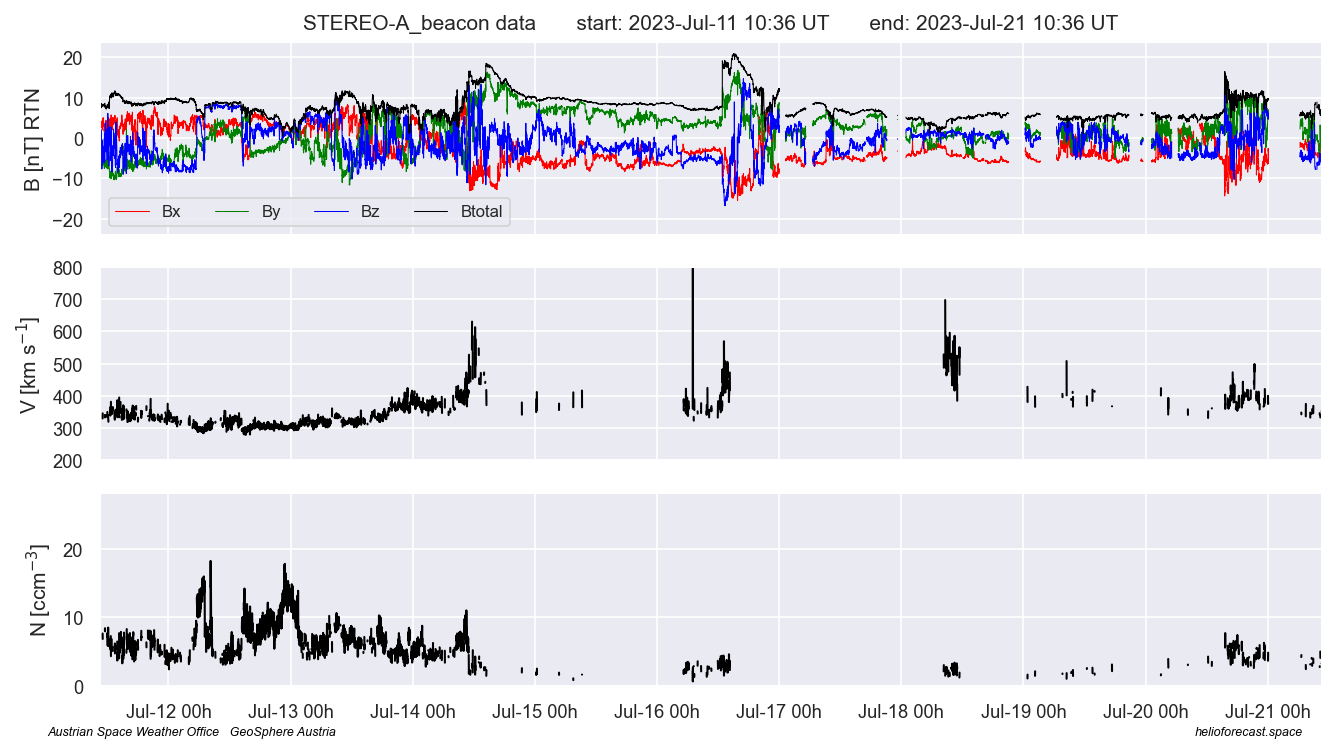

In [7]:
if debug_mode > 0: 
    importlib.reload(hd) 
    importlib.reload(hp) 

#test execution times
t0 = time.time()


print(' ')
print('------ STEREO-A beacon data ')

#define filename
file_sta_beacon='stereoa_beacon_last_300days_now.p'   

if get_stereoa > 0:

    print(' ')
    print('--- download STEREO-A beacon data last 30 days ')
    hd.stereoa_download_beacon(start=datetime.datetime.utcnow()-datetime.timedelta(days=30),end=datetime.datetime.utcnow(),stereoa_path=stereoa_path)   
    print(' ')

    print('--- process STEREO-A beacon data to pickle last 300 days') 
    #save pickle file
    hd.save_stereoa_beacon_data(data_path,stereoa_path,file_sta_beacon,datetime.datetime.utcnow()-datetime.timedelta(days=300),datetime.datetime.utcnow(),coord='RTN' )   
    
#load pickle    
[sta,hsta]=pickle.load(open(data_path+file_sta_beacon, "rb" ) )  

#plot
start=datetime.datetime.utcnow() - datetime.timedelta(days=10)
end=datetime.datetime.utcnow() 
hp.plot_insitu_update_stereoa_beacon(sta, start, end,'STEREO-A_beacon',plot_path+'stereoa/',now=True)
    
    
    
t1 = time.time()

print()
print('STEREO-A beacon downloading last 30 days, save as pickle last 300 days and plotting takes', np.round(t1-t0,2), 'seconds')

In [8]:

t1all = time.time()

print(' ')
print(' ')
print(' ')
print('------------------')
print('Runtime for full data update web code:', np.round((t1all-t0all)/60,2), 'minutes')
print('--------------------------------------------------------------------------------------')



 
 
 
------------------
Runtime for full data update web code: 5.35 minutes
--------------------------------------------------------------------------------------
